In [1]:
import pandas as pd
import numpy as np
import os
import time

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots

In [2]:
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

os.getcwd()

wholeDataset = pd.read_csv('C:/Users/Kacper/Desktop/University/Visualisation/Group/all_passes.csv')
wholeDataset[['start_x','end_x']] = wholeDataset[['start_x','end_x']]/100 * 68 # transofrming x coordinates to width in m
wholeDataset[['start_y','end_y']] = wholeDataset[['start_y','end_y']]/100 * 105 # transofrming x coordinates to width in m
wholeDataset.drop(['a','injurytime_play', 'through_ball', 'throw_ins'], axis = 1, inplace = True)

In [3]:
def make_division(pitch_width, pitch_length, divideByX, divideByY):
    """Creates a list of divideByX*divideByY nested lists that set up the bounaries of the different parts of the pitch"""
    div = []
    step_width = pitch_width/3
    step_height = pitch_length/4
    for i in range (0,divideByY):
        for k in range(0,divideByX):
            div.append([k*step_width,(k+1)*step_width, i*step_height, (i+1)*step_height ]) #format [start_x, end_x, start_y, end_y]
    return div

In [4]:
def compare_to_part(x,y, pitch_devisions):
    #print("going_in",x,y)
    for i in range (len(pitch_devisions)):
        if ((pitch_devisions[i][0] <= x <= pitch_devisions[i][1]) & (pitch_devisions[i][2] <= y <= pitch_devisions[i][3])):
            return i+1

### example
data = wholeDataset[wholeDataset['match_id'] == 30695]
pitch_devisions = make_division(68,105,3,4)
pitch_devisions

[[0.0, 22.666666666666668, 0.0, 26.25],
 [22.666666666666668, 45.333333333333336, 0.0, 26.25],
 [45.333333333333336, 68.0, 0.0, 26.25],
 [0.0, 22.666666666666668, 26.25, 52.5],
 [22.666666666666668, 45.333333333333336, 26.25, 52.5],
 [45.333333333333336, 68.0, 26.25, 52.5],
 [0.0, 22.666666666666668, 52.5, 78.75],
 [22.666666666666668, 45.333333333333336, 52.5, 78.75],
 [45.333333333333336, 68.0, 52.5, 78.75],
 [0.0, 22.666666666666668, 78.75, 105.0],
 [22.666666666666668, 45.333333333333336, 78.75, 105.0],
 [45.333333333333336, 68.0, 78.75, 105.0]]

In [5]:
start_x = data['start_x'][0]
start_y = data['start_y'][0]
start_x

31.483999999999998

In [6]:
start_y

47.984999999999999

In [7]:
compare_to_part(start_x,start_y, pitch_devisions)

5

In [8]:
data

,action_type,assists,competition,end_x,end_y,headed,k,kickoff,long_ball,match_id,mins,minsec,player_id,secs,start_x,start_y,team_id,type
0,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,38.556,18.270,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,298,2085,58,31.484,47.985,96,completed
1,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,31.484,47.985,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,296,7530,56,45.696,78.120,96,completed
2,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,45.696,78.120,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,292,2094,52,50.864,92.400,96,completed
3,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,52.292,96.285,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,288,458,48,59.704,89.355,96,completed
4,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,59.024,87.990,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,286,2085,46,46.308,65.520,96,completed
5,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,46.308,65.520,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,283,4125,43,51.068,78.540,96,completed
6,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,50.116,91.245,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,4,280,458,40,60.180,96.600,96,completed
7,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,48.348,99.435,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,3,230,2094,50,42.160,96.390,96,completed
8,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,39.304,94.080,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,3,228,2270,48,43.316,70.875,96,completed
9,Possession,NaN,home/jkx/Dokumente/squawka-scraper/crawlers/bu...,43.316,70.875,False,NaN,2017-01-21 14:30:00 +0000,NaN,30695,3,226,7530,46,36.380,67.725,96,completed


In [9]:
def create_div_cols(pitch_devisions, data):
    """ Adds columns saying what part of the pitch the pass originated from and to which part of the pitch the pass went"""
    data1 = data.copy()

    data1['part_of_origin'] = data1.apply(lambda row: compare_to_part(row['start_x'], row['start_y'], pitch_devisions), axis = 1)
    data1['part_of_dest'] = data1.apply(lambda row: compare_to_part(row['end_x'], row['end_y'], pitch_devisions), axis = 1)

    return data1



data_no_pitch_part = wholeDataset[wholeDataset['match_id'] == 30695]
data = create_div_cols(pitch_devisions, data_no_pitch_part).copy()

In [10]:
def create_pivot(data, start_time, end_time):
    start = min(data['secs'])*start_time
    end = max(data['secs'])*end_time
    data = data[(start<data['secs']) & (data['secs']<end)].copy()
    part_to_part_count = data.groupby(['part_of_origin', 'part_of_dest']).aggregate(['count'])['action_type']
    part_to_part_count = part_to_part_count.reset_index()
    pivot_table = part_to_part_count.pivot('part_of_origin', 'part_of_dest','count')
    return pivot_table

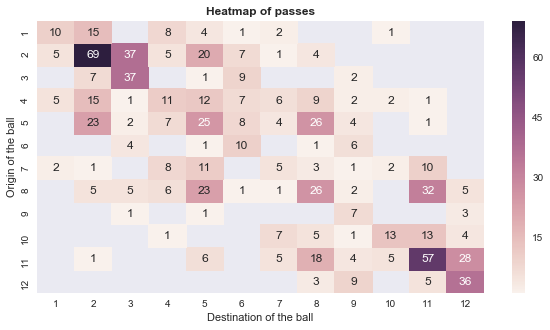

In [11]:
def create_heat(pivot_table):
    ax = sns.heatmap(pivot_table, annot = True)
    ax.set_xlabel("Destination of the ball")
    ax.set_ylabel("Origin of the ball")
    ax.set_title("Heatmap of passes", weight = "bold")

pivot_table = create_pivot(data, 0, 100)
create_heat(pivot_table)

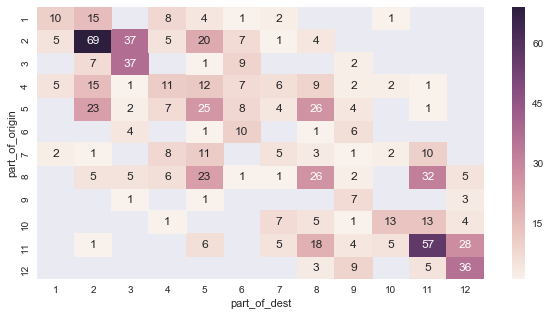

NameError: name 'fig' is not defined

In [12]:
for i in range(1,10):
    time.sleep(5)
    sns.heatmap(pivot_table, annot = True)
    plt.show()
    fig.canvas.draw()
    plt.clf()



    #create_heat(create_pivot(data,10*(i-1), 10*i) )
    #plt.clf()
    #plt.show(block = False)

In [15]:
x = pd.DataFrame(pivot_table)

In [16]:
x

part_of_dest,1,2,3,4,5,6,7,8,9,10,11,12
part_of_origin,,,,,,,,,,,,
1,10.0,15.0,NaN,8.0,4.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN
2,5.0,69.0,37.0,5.0,20.0,7.0,1.0,4.0,NaN,NaN,NaN,NaN
3,NaN,7.0,37.0,NaN,1.0,9.0,NaN,NaN,2.0,NaN,NaN,NaN
4,5.0,15.0,1.0,11.0,12.0,7.0,6.0,9.0,2.0,2.0,1.0,NaN
5,NaN,23.0,2.0,7.0,25.0,8.0,4.0,26.0,4.0,NaN,1.0,NaN
6,NaN,NaN,4.0,NaN,1.0,10.0,NaN,1.0,6.0,NaN,NaN,NaN
7,2.0,1.0,NaN,8.0,11.0,NaN,5.0,3.0,1.0,2.0,10.0,NaN
8,NaN,5.0,5.0,6.0,23.0,1.0,1.0,26.0,2.0,NaN,32.0,5.0
9,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,7.0,NaN,NaN,3.0


In [17]:
dick = x.to_dict()

In [18]:
dick

{1: {1: 10.0,
  2: 5.0,
  3: nan,
  4: 5.0,
  5: nan,
  6: nan,
  7: 2.0,
  8: nan,
  9: nan,
  10: nan,
  11: nan,
  12: nan},
 2: {1: 15.0,
  2: 69.0,
  3: 7.0,
  4: 15.0,
  5: 23.0,
  6: nan,
  7: 1.0,
  8: 5.0,
  9: nan,
  10: nan,
  11: 1.0,
  12: nan},
 3: {1: nan,
  2: 37.0,
  3: 37.0,
  4: 1.0,
  5: 2.0,
  6: 4.0,
  7: nan,
  8: 5.0,
  9: 1.0,
  10: nan,
  11: nan,
  12: nan},
 4: {1: 8.0,
  2: 5.0,
  3: nan,
  4: 11.0,
  5: 7.0,
  6: nan,
  7: 8.0,
  8: 6.0,
  9: nan,
  10: 1.0,
  11: nan,
  12: nan},
 5: {1: 4.0,
  2: 20.0,
  3: 1.0,
  4: 12.0,
  5: 25.0,
  6: 1.0,
  7: 11.0,
  8: 23.0,
  9: 1.0,
  10: nan,
  11: 6.0,
  12: nan},
 6: {1: 1.0,
  2: 7.0,
  3: 9.0,
  4: 7.0,
  5: 8.0,
  6: 10.0,
  7: nan,
  8: 1.0,
  9: nan,
  10: nan,
  11: nan,
  12: nan},
 7: {1: 2.0,
  2: 1.0,
  3: nan,
  4: 6.0,
  5: 4.0,
  6: nan,
  7: 5.0,
  8: 1.0,
  9: nan,
  10: 7.0,
  11: 5.0,
  12: nan},
 8: {1: nan,
  2: 4.0,
  3: nan,
  4: 9.0,
  5: 26.0,
  6: 1.0,
  7: 3.0,
  8: 26.0,
  9: nan,
  

In [19]:
list_1 = []

In [20]:
for i in range(1,13):
    for p in range(1,13):
        if dick[i][p] > 0:
            list_1.append((i, p, dick[i][p]))

In [21]:
list_1

[(1, 1, 10.0),
 (1, 2, 5.0),
 (1, 4, 5.0),
 (1, 7, 2.0),
 (2, 1, 15.0),
 (2, 2, 69.0),
 (2, 3, 7.0),
 (2, 4, 15.0),
 (2, 5, 23.0),
 (2, 7, 1.0),
 (2, 8, 5.0),
 (2, 11, 1.0),
 (3, 2, 37.0),
 (3, 3, 37.0),
 (3, 4, 1.0),
 (3, 5, 2.0),
 (3, 6, 4.0),
 (3, 8, 5.0),
 (3, 9, 1.0),
 (4, 1, 8.0),
 (4, 2, 5.0),
 (4, 4, 11.0),
 (4, 5, 7.0),
 (4, 7, 8.0),
 (4, 8, 6.0),
 (4, 10, 1.0),
 (5, 1, 4.0),
 (5, 2, 20.0),
 (5, 3, 1.0),
 (5, 4, 12.0),
 (5, 5, 25.0),
 (5, 6, 1.0),
 (5, 7, 11.0),
 (5, 8, 23.0),
 (5, 9, 1.0),
 (5, 11, 6.0),
 (6, 1, 1.0),
 (6, 2, 7.0),
 (6, 3, 9.0),
 (6, 4, 7.0),
 (6, 5, 8.0),
 (6, 6, 10.0),
 (6, 8, 1.0),
 (7, 1, 2.0),
 (7, 2, 1.0),
 (7, 4, 6.0),
 (7, 5, 4.0),
 (7, 7, 5.0),
 (7, 8, 1.0),
 (7, 10, 7.0),
 (7, 11, 5.0),
 (8, 2, 4.0),
 (8, 4, 9.0),
 (8, 5, 26.0),
 (8, 6, 1.0),
 (8, 7, 3.0),
 (8, 8, 26.0),
 (8, 10, 5.0),
 (8, 11, 18.0),
 (8, 12, 3.0),
 (9, 3, 2.0),
 (9, 4, 2.0),
 (9, 5, 4.0),
 (9, 6, 6.0),
 (9, 7, 1.0),
 (9, 8, 2.0),
 (9, 9, 7.0),
 (9, 10, 1.0),
 (9, 11, 4.0),
 (9, 12

In [22]:
import math
import networkx as nx

In [23]:
def dijkstra(graph,start,goal):
    shortest_distance = {}
    predecessor = {}
    unseenNodes = graph
    infinity = math.inf
    path = []
    for node in unseenNodes:
        shortest_distance[node] = infinity
    shortest_distance[start] = 0
 
    while unseenNodes:
        minNode = None
        for node in unseenNodes:
            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode]:
                minNode = node
 
        for childNode, weight in graph[minNode].items():
            if weight + shortest_distance[minNode] < shortest_distance[childNode]:
                shortest_distance[childNode] = weight + shortest_distance[minNode]
                predecessor[childNode] = minNode
        unseenNodes.pop(minNode)
 
    currentNode = goal
    while currentNode != start:
        try:
            path.insert(0,currentNode)
            currentNode = predecessor[currentNode]
        except KeyError:
            print('Path not reachable')
            break
    path.insert(0,start)
    if shortest_distance[goal] != infinity:
        print('Shortest distance is ' + str(shortest_distance[goal]))
        print('And the path is ' + str(path))

In [24]:
dijkstra(dick, 2, 11)

Shortest distance is 1.0
And the path is [2, 11]


In [25]:
Dg = nx.DiGraph()
Dg.add_weighted_edges_from(list_1)

In [26]:
Dg.number_of_nodes()

12

In [27]:
Dg.number_of_edges()

87

In [28]:
dick2 = {}

In [29]:
for i in range(1,13):
    dick2[i] = (i, i)

In [30]:
dick2

{1: (1, 1),
 2: (2, 2),
 3: (3, 3),
 4: (4, 4),
 5: (5, 5),
 6: (6, 6),
 7: (7, 7),
 8: (8, 8),
 9: (9, 9),
 10: (10, 10),
 11: (11, 11),
 12: (12, 12)}

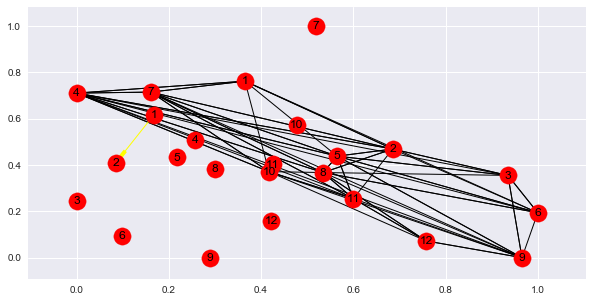

In [32]:
nx.draw_networkx(Dg, with_labels=True, arrows=False) #pos=dick2 pos=nx.spring_layout(Dg) node_color=('blue')
nx.draw_networkx(Dg, edgelist=[(1,2)], edge_color='yellow')